###

# Implemente el método de validación cruzada con K-iteraciones para encontrar el o los mejores parámetros de los algoritmos K-NN y árbol de decisión. Lo mismo pero usando "leave-one-out".

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('./ecoli.csv') 
df

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [61]:
X = df.drop(['sequence', 'class'], axis=1)
X

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [62]:
y = df['class']
y

0      cp
1      cp
2      cp
3      cp
4      cp
       ..
331    pp
332    pp
333    pp
334    pp
335    pp
Name: class, Length: 336, dtype: object

In [63]:
def mostrar_resultados(errores, title_text, xlabel_text, xaxis_values):
    plt.figure(figsize=(10, 5))

    ks = [error[0] for error in errores]
    errs = [error[1] for error in errores]
    plt.plot(ks, errs, color='orange')

    plt.scatter(ks, errs, color='red', zorder=2)

    plt.title(title_text)
    plt.xlabel(xlabel_text)
    plt.ylabel("Error promedio")

    plt.xticks(xaxis_values)
    plt.grid(True)
    plt.show()

## Los hiperparámetros son los valores de k para el K-NN y los valores de profundidad para el árbol de decisión.

In [64]:
k_values = range(1, 25)
depth_values = range(1, 15)

### Validacion cruzada.

In [65]:
kf = KFold(shuffle=True, random_state=42)

In [66]:
errores_knn = []
for k_value in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k_value)
    scores = cross_val_score(modelo, X, y, cv=kf)
    error_promedio = 1 - np.mean(scores)
    errores_knn.append((k_value, error_promedio))

for index, error_knn in enumerate(errores_knn):
    print(f"{error_knn[0]:2}: {error_knn[1]:.3f}", end='\t')
    if (index + 1) % 5 == 0: print()

mejor_knn = min(errores_knn, key=lambda x: x[1])
print(f"\nMejor valor del hiperparámetro k: {mejor_knn[0]} con error promedio de: {mejor_knn[1]:.3f}")

 1: 0.188	 2: 0.182	 3: 0.152	 4: 0.152	 5: 0.149	
 6: 0.155	 7: 0.134	 8: 0.146	 9: 0.143	10: 0.146	
11: 0.137	12: 0.140	13: 0.137	14: 0.146	15: 0.146	
16: 0.143	17: 0.146	18: 0.149	19: 0.158	20: 0.155	
21: 0.161	22: 0.161	23: 0.161	24: 0.170	
Mejor valor del hiperparámetro k: 7 con error promedio de: 0.134


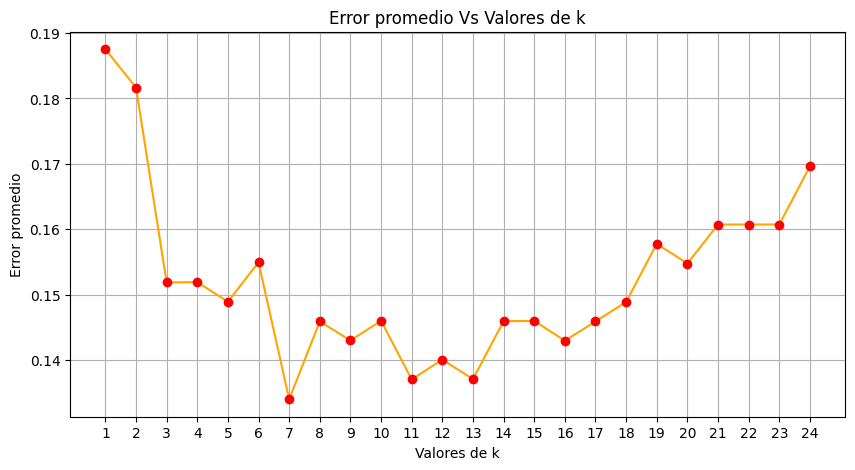

In [67]:
title = "Error promedio Vs Valores de k"
xlabel = "Valores de k"
mostrar_resultados(errores_knn, title, xlabel, k_values)

In [68]:
errores_tree = []
for depth_value in depth_values:
    modelo = DecisionTreeClassifier(max_depth=depth_value, random_state=23)
    scores = cross_val_score(modelo, X, y, cv=kf)
    error_promedio = 1 - np.mean(scores)
    errores_tree.append((depth_value, error_promedio))

for index, error_tree in enumerate(errores_tree):
    print(f"{error_tree[0]:2}: {error_tree[1]:.3f}", end='\t')
    if (index + 1) % 5 == 0: print()

mejor_tree = min(errores_tree, key=lambda x: x[1])
print(f"\nMejor valor del hiperparámetro max_depth: {mejor_tree[0]} con error promedio de: {mejor_tree[1]:.3f}")

 1: 0.354	 2: 0.229	 3: 0.187	 4: 0.164	 5: 0.181	
 6: 0.190	 7: 0.193	 8: 0.187	 9: 0.196	10: 0.193	
11: 0.193	12: 0.193	13: 0.193	14: 0.193	
Mejor valor del hiperparámetro max_depth: 4 con error promedio de: 0.164


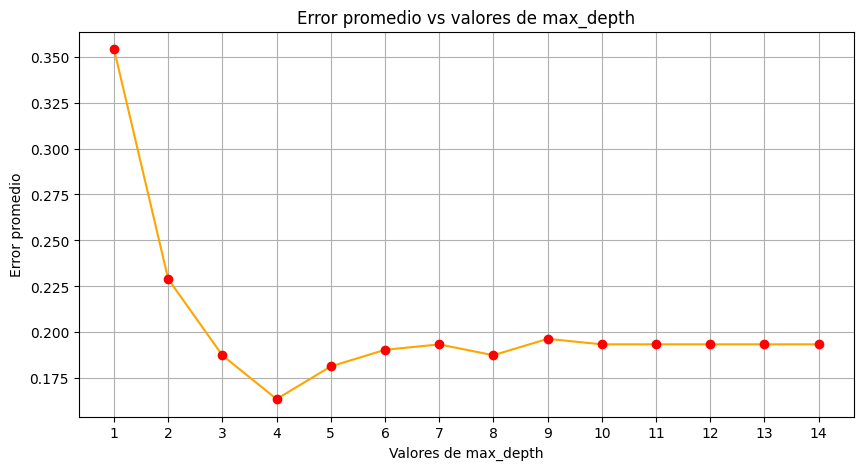

In [69]:
title = "Error promedio vs valores de max_depth"
xlabel = "Valores de max_depth"
mostrar_resultados(errores_tree, title, xlabel, depth_values)

### Leave one out

In [70]:
leave_one_out = LeaveOneOut()

In [71]:
errores_knn = []
for k_value in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k_value)
    scores = cross_val_score(modelo, X, y, cv=leave_one_out)
    error_promedio = 1 - np.mean(scores)
    errores_knn.append((k_value, error_promedio))

for index, error_knn in enumerate(errores_knn):
    print(f"{error_knn[0]:2}: {error_knn[1]:.3f}", end='\t')
    if (index + 1) % 5 == 0: print()

mejor_knn = min(errores_knn, key=lambda x: x[1])
print(f"\nMejor valor del hiperparámetro k: {mejor_knn[0]} con error promedio de: {mejor_knn[1]:.3f}")

 1: 0.188	 2: 0.182	 3: 0.155	 4: 0.149	 5: 0.140	
 6: 0.149	 7: 0.125	 8: 0.140	 9: 0.125	10: 0.131	
11: 0.137	12: 0.137	13: 0.137	14: 0.143	15: 0.146	
16: 0.149	17: 0.149	18: 0.152	19: 0.155	20: 0.155	
21: 0.158	22: 0.152	23: 0.155	24: 0.155	
Mejor valor del hiperparámetro k: 7 con error promedio de: 0.125


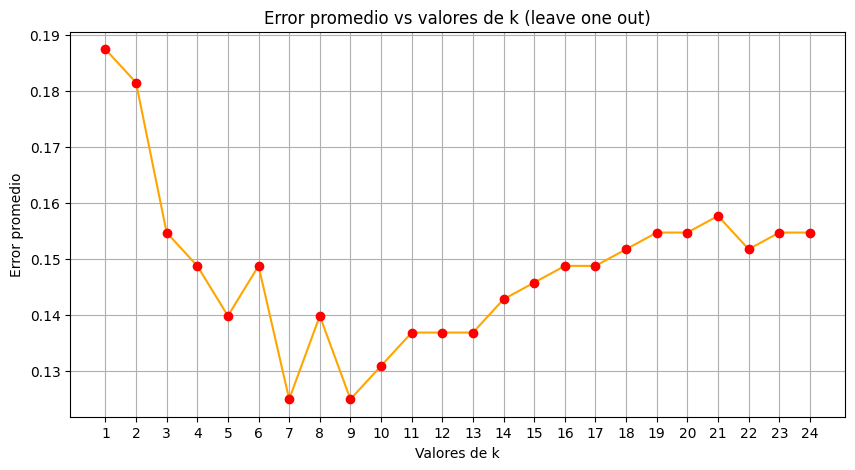

In [72]:
title = "Error promedio vs valores de k (leave one out)"
xlabel = "Valores de k"
mostrar_resultados(errores_knn, title, xlabel, k_values)

In [73]:
errores_tree = []
for depth_value in depth_values:
    modelo = DecisionTreeClassifier(max_depth=depth_value, random_state=23)
    scores = cross_val_score(modelo, X, y, cv=leave_one_out)
    error_promedio = 1 - np.mean(scores)
    errores_tree.append((depth_value, error_promedio))

for index, error_tree in enumerate(errores_tree):
    print(f"{error_tree[0]:2}: {error_tree[1]:.3f}", end='\t')
    if (index + 1) % 5 == 0: print()

mejor_tree = min(errores_tree, key=lambda x: x[1])
print(f"\nMejor valor del hiperparámetro max_depth: {mejor_tree[0]} con error promedio de: {mejor_tree[1]:.3f}")

 1: 0.354	 2: 0.280	 3: 0.205	 4: 0.164	 5: 0.170	
 6: 0.188	 7: 0.182	 8: 0.188	 9: 0.196	10: 0.199	
11: 0.199	12: 0.199	13: 0.199	14: 0.199	
Mejor valor del hiperparámetro max_depth: 4 con error promedio de: 0.164


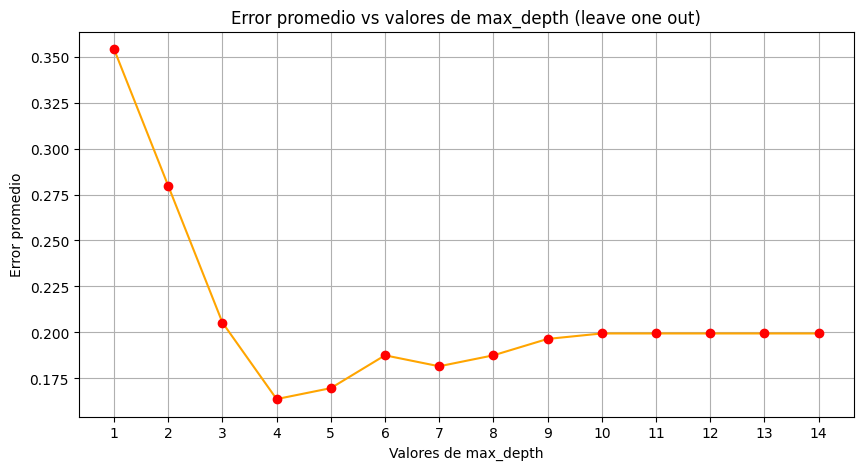

In [74]:
title = "Error promedio vs valores de max_depth (leave one out)"
xlabel = "Valores de max_depth"
mostrar_resultados(errores_tree, title, xlabel, depth_values)